# Debug Kinematics

In [28]:
# inputs
from importlib import reload
import os

import numpy as np
import xarray

from gsw import density

from ulmo.llc import kinematics
from ulmo.plotting import plotting

# Load up 

In [4]:
ex_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 
                       'data', 'ThetaUVSalt', 'LLC4320_2011-09-30T00_00_00.nc')
ds = xarray.open_dataset(ex_file)

# Grab full images (~5Gb RAM)

In [5]:
sst = ds.Theta.values
U = ds.U.values
V = ds.V.values
Salt = ds.Salt.values

# Kinematics

In [10]:
FS_stat_dict = {}
FS_stat_dict['calc_FS'] = True
# Frontogenesis
FS_stat_dict['Fronto_thresh'] = 2e-4 
FS_stat_dict['Fronto_sum'] = True
# Fronts
FS_stat_dict['Front_thresh'] = 3e-3 

# Cutout

In [7]:
row=5488
col=4357
#
r = row
c = col
dc = 64
dr = 64

In [9]:
items = [U[r:r+dr, c:c+dc],
         V[r:r+dr, c:c+dc],
         sst[r:r+dr, c:c+dc],
         Salt[r:r+dr, c:c+dc], 0]

In [11]:
idx, kin_metrics, F_s, gradb = kinematics.cutout_kin(items, FS_stat_dict, extract_kin=True)

In [13]:
kin_metrics

{'FS_Npos': 0, 'FS_pos_sum': 1.9024609436152127e-12, 'gradb_Npos': 0}

In [15]:
F_s.max()

4.766163677620193e-14

# $F_S$

In [23]:
reload(kinematics)
kinematics.calc_F_s(items[0], items[1], items[2], items[3])

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.13.2 -- An enhanced Interactive Python. Type '?' for help.


196 of kinematics.py



In [1]:  dbdx.max()


Out[1]: 2.8627510956225066e-07



In [2]:  exit


array([[ 1.37266911e-16,  1.91276868e-16,  5.06907256e-16, ...,
        -2.42465499e-19, -3.63191823e-20, -2.85359548e-19],
       [ 5.10114082e-17,  1.68315860e-16,  4.76278832e-16, ...,
         2.07185097e-20, -3.55416810e-19, -2.07578932e-19],
       [-2.71736505e-17, -1.23318018e-17,  6.44264851e-17, ...,
         1.45183162e-17,  2.05139706e-18, -1.89964891e-19],
       ...,
       [ 2.10088275e-17,  1.48310249e-16,  1.90278288e-16, ...,
        -2.26556874e-17, -7.61094183e-16, -6.96099412e-16],
       [-2.23097389e-16,  2.04939338e-17,  1.65176336e-16, ...,
        -8.76361942e-17, -5.14610025e-16, -7.43295322e-16],
       [-6.13596202e-16, -1.66941969e-16,  8.03232006e-17, ...,
        -1.10356771e-16, -2.61893197e-16, -3.34671993e-16]])

In [30]:
U, V, Theta, Salt, _ = items

## Calculation

In [32]:
ref_rho=1025.
g=0.0098
dx=2.

dUdx = np.gradient(U, axis=1)
dVdx = np.gradient(V, axis=1)
#
dUdy = np.gradient(U, axis=0)
dVdy = np.gradient(V, axis=0)

# Buoyancy
rho = density.rho(Salt, Theta, np.zeros_like(Salt))
dbdx = -1*np.gradient(g*rho/ref_rho, axis=1) / dx
dbdy = -1*np.gradient(g*rho/ref_rho, axis=0) / dx

# Terms
F_s_x = -1 * (dUdx*dbdx + dVdx*dbdy) * dbdx 
F_s_y = -1 * (dUdy*dbdx + dVdy*dbdy) * dbdy 

# Finish
F_s = F_s_x + F_s_y
#embed(header='196 of kinematics.py')


<Axes: >

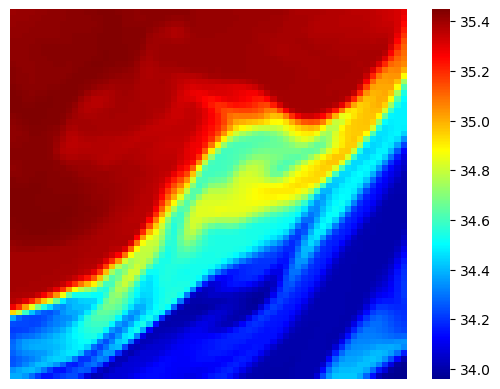

In [36]:
plotting.show_image(Salt)

<Axes: >

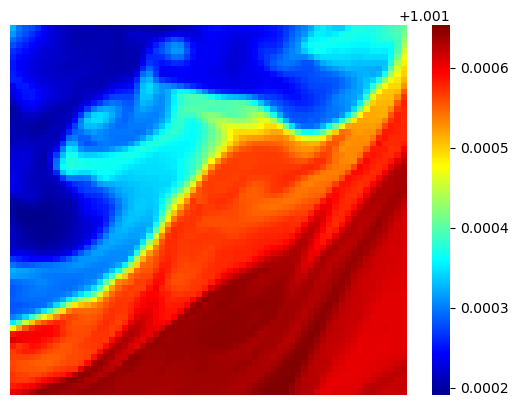

In [35]:
plotting.show_image(rho/ref_rho)

<Axes: >

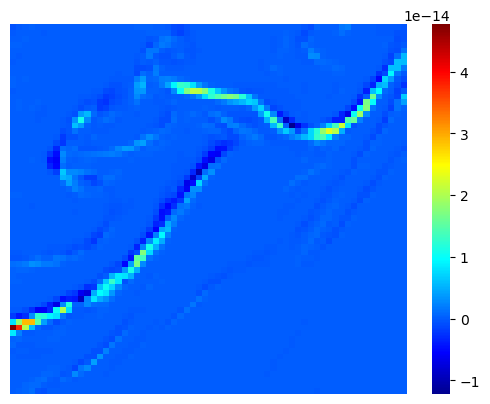

In [37]:
plotting.show_image(F_s)

----

<Axes: >

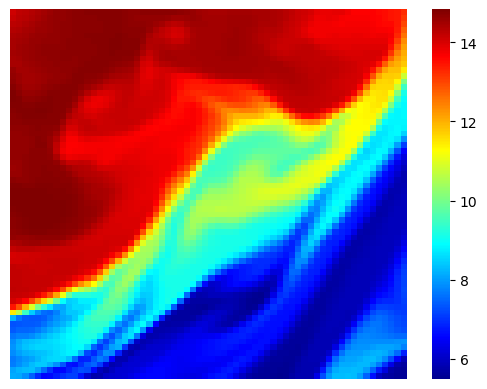

In [18]:
plotting.show_image(items[2])